In [6]:
import pandas as pd  
directorio = "https://raw.githubusercontent.com/KevinGodoy98/Simulacion/main/forestfires.csv"
df= pd.read_csv(directorio,sep=',')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


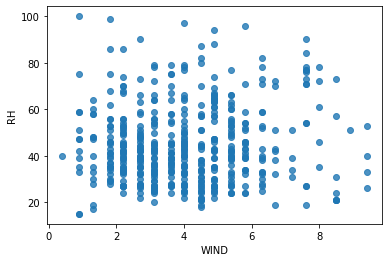

In [50]:
import matplotlib.pyplot as plt
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.wind, y=df.RH, alpha= 0.8)
ax.set_xlabel('WIND')
ax.set_ylabel('RH');

In [48]:
import numpy as np
# Calcular la matriz de covarianza
covxy = np.cov(df['wind'], df['RH'])
coef= np.corrcoef(df['wind'], df['RH'])
print('la matriz de covarianza:\n',covxy)
print('Coeficientes de correlacion:\n',coef)


la matriz de covarianza:
 [[  3.21001904   2.02921971]
 [  2.02921971 266.25980238]]
Coeficientes de correlacion:
 [[1.         0.06941007]
 [0.06941007 1.        ]]


In [ ]:
cov_mat = df.cov()
cov_mat


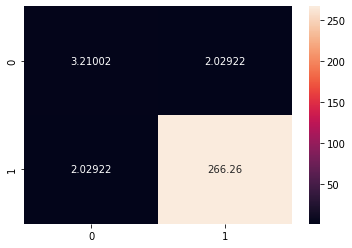

In [37]:
import seaborn as sns
sns.heatmap(covxy, annot=True, fmt='g')
plt.show()

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =df[["wind"]]
X_train = np.array(dataX)
y_train = df['RH'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.63215192]
Independent term: 
 41.74846661945818
Mean squared error: 264.46
Variance score: 0.00


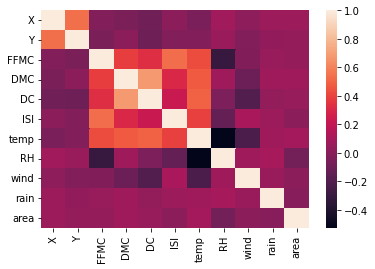

In [47]:
sns.heatmap(df.corr(), fmt='g')
plt.show()